In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Occupation_Status ~ Citizenship - 두현

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/train_df.csv')

In [ ]:
df.shape

(20000, 20)

In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'Income'],
      dtype='object')

In [ ]:
def make_hist(df):
    plt.hist(df, bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {df.name}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')

#Occupation_Status
> [가설 설정] :    
  - 전문성을 요구하는 직업이나 기술직의 소득이 높을 것이다
  (변호사, 의사, 중장비 기사 등)

In [ ]:
df['Occupation_Status'].unique()

array(['Services', 'Admin Support (include Clerical)',
       'Technicians & Support', 'Sales', 'Unknown',
       'Machine Operators & Inspectors', 'Craft & Repair',
       'Protective Services', 'Management', 'Professional',
       'Transportation', 'Handlers/Cleaners',
       'Private Household Services', 'Farming & Forestry & Fishing',
       'Armed Forces'], dtype=object)

In [ ]:
con = df['Occupation_Status'] == 'Technicians & Support'
# Management / Services / Admin Support (include Clerical) / Technicians & Support
df[con].groupby(['Industry_Status'])['Income'].agg(['count','mean'])

,count,mean
Industry_Status,,
Agriculture,13,585.769231
Business & Repair,29,845.758621
Communications,8,948.250000
Construction,11,887.090909
Education,17,550.882353
Entertainment,2,1861.500000
Finance Insurance & Real Estate,17,1334.647059
Forestry & Fisheries,2,625.000000
Hospitals,120,1001.950000


In [ ]:
df.groupby('Occupation_Status')['Income'].agg(['count','mean']).sort_values(by = 'mean', ascending = False)

,count,mean
Occupation_Status,,
Technicians & Support,558,1002.417563
Craft & Repair,1869,986.415730
Professional,1488,884.705645
Transportation,690,846.002899
Protective Services,260,823.511538
Machine Operators & Inspectors,1383,802.055676
Admin Support (include Clerical),2709,750.374677
Handlers/Cleaners,837,655.152927
Management,1111,619.179118


- 평균 Income 기준    
> 기술자 및 지원직 (Technicians & Support)    
장인 및 수리직 (Craft & Repair)    
전문직 (Professional)    
운송업 (Transportation)    
경비 서비스 (Protective Services)    
기계 조작 및 검사자 (Machine Operators & Inspectors)    
행정 지원 (Admin Support)    
핸들러/청소원 (Handlers/Cleaners)    
경영직 (Management)    
서비스직 (Services)        
판매직 (Sales)    
농업 및 임업 및 어업 (Farming & Forestry & Fishing)    
가정 내 서비스 (Private Household Services)    
군인 (Armed Forces)    

In [ ]:
con1 = df['Occupation_Status'] == 'Unknown'
con2 = df['Occupation_Status'] == 'Armed Forces'

df[con2]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Summary,Citizenship,Birth_Country,Tax_Status,Gains,Losses,Dividends,Income_Status,Income
10342,TRAIN_10342,31,F,College,Seeking Full-Time,20,Armed Forces,Armed Forces,White,Puerto Rican,Married,Spouse of householder,Native,US,Married Filling Jointly both under 65 (MFJ),0.0,0.0,0.0,Under Median,0


#Race
> [가설 설정]
 - 백인의 소득이 가장 높을 것이다.   

In [ ]:
df['Race'].unique()

array(['White', 'Black', 'Native American/Aleut/Eskimo', 'Asian/Pacific',
       'Other'], dtype=object)

> 아시아인/태평양 섬 주민 (Asian/Pacific)    
흑인 (Black)    
원주민/알류트/에스키모 (Native American/Aleut/Eskimo)
기타 (Other)    
백인 (White)

In [ ]:
df.groupby('Race')[['Income']].agg(['count','mean'])
# Race 구성 비율 차이가 너무 크다

Income            
                              count        mean
Race                                           
Asian/Pacific                   511  524.512720
Black                          2122  512.730914
Native American/Aleut/Eskimo    226  533.079646
Other                           296  411.206081
White                         16845  563.554230

#Hispanic_Origin
> [가설 설정]
 - All other (대다수 US 출신 or Europe)이 소득이 높을 것이다.   
 (All other의 비중이 상당하다)

In [ ]:
df['Hispanic_Origin'].unique()

array(['All other', 'Cuban', 'Mexican (Mexicano)',
       'Central or South American', 'Puerto Rican', 'Mexican-American',
       'Other Spanish', 'Chicano'], dtype=object)

> 기타 (All other)    
중앙 또는 남미계 (Central or South American)    
치카노 (Chicano)
쿠바계 (Cuban)    
멕시코계 (Mexican - Mexicano)    
멕시코계 미국인 (Mexican-American)      
기타 스페인계 (Other Spanish)    
푸에르토리코계 (Puerto Rican)    

In [ ]:
df.groupby('Hispanic_Origin')[['Income']].agg(['count','mean'])
# hispanic_origin 구성 비율 차이가 너무 크다

Income            
                           count        mean
Hispanic_Origin                             
All other                  17847  573.630638
Central or South American    326  354.996933
Chicano                       27  644.925926
Cuban                         77  365.987013
Mexican (Mexicano)           625  395.033600
Mexican-American             654  420.946483
Other Spanish                201  381.213930
Puerto Rican                 243  385.090535

# Martial_Status
> [가설 설정]
- 결혼한 사람이 소득이 가장 높을 것이다

In [ ]:
df['Martial_Status'].unique()

array(['Married', 'Separated', 'Divorced', 'Widowed', 'Single',
       'Married (Spouse Absent)', 'Married (Armed Force Spouse)'],
      dtype=object)

> 미혼 (Single)    
기혼 (Married)    
별거 (Separated)    
배우자 없는 기혼 (Married - Spouse Absent)    
군인 배우자 있는 기혼 (Married - Armed Force Spouse)    
이혼 (Divorced)    
사별 (Widowed)    

In [ ]:
df.groupby('Martial_Status')[['Income']].agg(['count','mean'])
# 군인과 결혼이 평균 소득이 가장 높다.
# 싱글과 과부의 평균 소득이 가장 낮다.
#

Income            
                              count        mean
Martial_Status                                 
Divorced                       1633  692.336803
Married                        9554  687.201172
Married (Armed Force Spouse)     70  920.000000
Married (Spouse Absent)         171  528.070175
Separated                       436  632.185780
Single                         7380  368.479404
Widowed                         756  324.719577

In [ ]:
con = df['Martial_Status'] == 'Married (Armed Force Spouse)'

df[con].groupby('Occupation_Status')['Income'].count()

Occupation_Status
Admin Support (include Clerical)    17
Craft & Repair                       1
Handlers/Cleaners                    3
Management                           5
Professional                         7
Protective Services                  1
Sales                                8
Services                            14
Technicians & Support                6
Unknown                              8
Name: Income, dtype: int64

#Household_Summary
> [가설 설정]
- 가주주와 배우자의 소득이 높다
- 자녀들은 소득이 낮다

In [ ]:
df['Household_Summary'].unique()

array(['Householder', 'Child 18 or older', 'Spouse of householder',
       'Other relative of householder', 'Child under 18 never married',
       'Nonrelative of householder',
       'Group Quarters- Secondary individual',
       'Child under 18 ever married'], dtype=object)

> 가구주 (Householder)    
가구주의 배우자 (Spouse of householder)    
만 18세 이상의 자녀 (Child 18 or older)    
만 18세 미만의 미혼 자녀 (Child under 18 never married)    
만 18세 미만의 결혼 경험이 있는 자녀 (Child under 18 ever married)    
가구주의 다른 친척 (Other relative of householder)    
가구주의 비친족 (Nonrelative of householder)    
집단 생활 시설 - 부차적 개인 (Group Quarters- Secondary individual)    

In [ ]:
df.groupby('Household_Summary')['Income'].agg(['count','mean']).sort_values(by = 'mean',ascending = False)

,count,mean
Household_Summary,,
Householder,8552,698.814312
Spouse of householder,4794,620.124322
Nonrelative of householder,974,539.687885
Child 18 or older,2192,518.402828
Group Quarters- Secondary individual,24,409.625000
Other relative of householder,781,380.788732
Child under 18 ever married,4,225.000000
Child under 18 never married,2679,64.220605


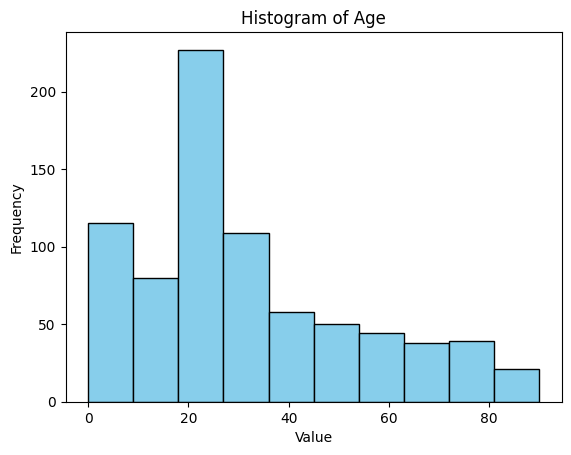

In [ ]:
#  가구주의 친척은 할머니 혹은 할아버지일 것이다.
con = df['Household_Summary'] == 'Other relative of householder'

make_hist(df[con]['Age'])
# 20대가 많다

#Citizenship
> [가설 설정]
- Native의 평균 Income이 높을 것이다

In [ ]:
df['Citizenship'].unique()

array(['Native', 'Foreign-born (Non-US Citizen)',
       'Native (Born in Puerto Rico or US Outlying)',
       'Foreign-born (Naturalized US Citizen)', 'Native (Born Abroad)'],
      dtype=object)

>해외에서 태어나, 귀화한 미국 시민권자 (Foreign-born - Naturalized US Citizen)    
해외에서 태어나, 미국 시민권자가 아닌 사람 (Foreign-born - Non-US Citizen)    
출생지 미국 (Native)    
출생지가 푸에르토리코 또는 미국 외 지역인 미국 국적 사람 (Native - Born in
Puerto Rico or US Outlying)    
해외에서 출생한 미국 국적자 (Native - Born Abroad)

In [ ]:
df.groupby('Citizenship')[['Income']].agg(['count','mean'])
# 구성 비율 차이가 크다.
# Native인지 아닌지로 구분하는 것이 어떨까 싶음
# foreign-born 중에서도 미국으로 귀화한 사람의 평균 Income이 높긴 하지만 구성 비율로 봤을 땐 다시 생각해볼 필요가 있는 것 같다.

Income            
                                             count        mean
Citizenship                                                   
Foreign-born (Naturalized US Citizen)          588  664.627551
Foreign-born (Non-US Citizen)                 1258  436.466614
Native                                       17825  560.650659
Native (Born Abroad)                           197  542.421320
Native (Born in Puerto Rico or US Outlying)    132  386.166667

In [ ]:
con = df['Citizenship'] == 'Foreign-born (Naturalized US Citizen)'

df[con].groupby('Birth_Country')['Income'].agg(['count','mean']).sort_values(by='mean',ascending = False)

,count,mean
Birth_Country,,
Thailand,1,1888.000000
Peru,8,1646.875000
Trinadad&Tobago,2,1550.000000
Jamaica,22,983.454545
Hong Kong,7,971.428571
Philippines,71,853.507042
Guatemala,4,842.500000
US,80,838.000000
Vietnam,13,811.769231
